# Creating a fraud identification model
- Base information:
     - 'Time': contains the seconds elapsed between each transaction and the first transaction in the dataset.
     - 'Amount': is the value of the transaction
     - 'Class': is the response variable and takes value 1 in case of fraud and 0 otherwise.
     - "Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Characteristics V1, V2, … V28 are the main components obtained with PCA"

In [635]:
import pandas as pd
import matplotlib.pyplot as plt

In [636]:
transacoes = pd.read_csv('creditcard.csv')

In [637]:
transacoes.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [638]:
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [639]:
transacoes.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [640]:
transacoes.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Modify Time and Amount

In [641]:
transacoes["Time"] = transacoes["Time"]/transacoes["Time"].max()
transacoes["Amount"] = transacoes["Amount"]/transacoes["Amount"].max()

**Qual o percentual de transações que são fraudes?**

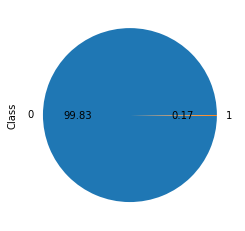

In [642]:
# Check % of fraud
transacoes.Class.value_counts().plot.pie(autopct='%.2f');

### Creating a machine learning model to identify fraud
- Let's create a model to identify fraud without doing any treatment on that basis

In [643]:
# Split X and y
X = transacoes.drop('Class',axis=1)
y = transacoes.Class

In [644]:
# Split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [721]:
# Checking the distribution of the two classes in the training and testing base
y_train.value_counts()/y_train.shape[0]

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [646]:
# For the test base
y_test.value_counts()/y_test.shape[0]

0    0.998276
1    0.001724
Name: Class, dtype: float64

In [647]:
y_test.value_counts()

0    93825
1      162
Name: Class, dtype: int64

In [648]:
# Importing the decision tree
from sklearn import tree

In [649]:
# Defining our classifier
clf = tree.DecisionTreeClassifier(random_state=42)

In [650]:
# Fitting to training data
clf = clf.fit(X_train, y_train)

In [651]:
# Making the prediction
y_pred = clf.predict(X_test)

In [652]:
# Importing the accuracy
from sklearn.metrics import accuracy_score

In [653]:
# Calculating the accuracy
accuracy_score(y_test,y_pred)

0.9991594582229457

**Checking now the confusion matrix, precision and recall**

In [654]:
# Importing the confusion matrix
from sklearn.metrics import confusion_matrix

In [655]:
# Importing the confusion matrix
confusion_matrix(y_test,y_pred)

array([[93786,    39],
       [   40,   122]], dtype=int64)

In [656]:
# Calculating the precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7577639751552795

In [657]:
# Andrecall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.7530864197530864

## Randomly selecting

#### Performing random undersampling

In [658]:
# Import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler 

In [659]:
# RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [660]:
X_resRU, y_resRU = rus.fit_resample(X_train, y_train)

In [661]:
y_resRU.value_counts()

0    330
1    330
Name: Class, dtype: int64

#### Undersampling | Decision Tree

In [662]:
# Fitting to the already balanced training data
clf_DT = tree.DecisionTreeClassifier(random_state=42)
clf_DT.fit(X_resRU, y_resRU)

DecisionTreeClassifier(random_state=42)

In [663]:
# Making the prediction for the test data
y_pred_DT = clf_DT.predict(X_test)
y_pred_proba_DT = clf_DT.predict_proba(X_test)

In [664]:
# Visualizing the confusion matrix
confusion_matrix(y_test,y_pred_DT)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

#### Undersampling | Logistic Regression

In [665]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=0)
clf_LR.fit(X_resRU, y_resRU)

LogisticRegression(random_state=0)

In [666]:
y_pred_LR = clf_LR.predict(X_test)
y_pred_proba_LR = clf_LR.predict_proba(X_test)

In [667]:
confusion_matrix(y_test,y_pred_LR)

array([[89875,  3950],
       [   15,   147]], dtype=int64)

#### Undersampling | Support Vector Machine

In [668]:
from sklearn.svm import SVC

clf_SVM = SVC(random_state=0, probability=True)
clf_SVM.fit(X_resRU, y_resRU)

SVC(probability=True, random_state=0)

In [669]:
y_pred_SVM = clf_SVM.predict(X_test)
y_pred_proba_SVM = clf_SVM.predict_proba(X_test)

In [670]:
confusion_matrix(y_test,y_pred_SVM)

array([[92433,  1392],
       [   24,   138]], dtype=int64)

#### Undersampling | KNN

In [671]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_resRU, y_resRU)

KNeighborsClassifier(n_neighbors=3)

In [672]:
y_pred_KNN = clf_KNN.predict(X_test)
y_pred_proba_KNN = clf_KNN.predict_proba(X_test)

In [673]:
confusion_matrix(y_test,y_pred_KNN)

array([[91136,  2689],
       [   15,   147]], dtype=int64)

#### Undersampling | Random Forest

In [674]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_resRU, y_resRU)

RandomForestClassifier(max_depth=2, random_state=0)

In [675]:
y_pred_RF = clf_RF.predict(X_test)
y_pred_proba_RF = clf_RF.predict_proba(X_test)

In [676]:
confusion_matrix(y_test,y_pred_RF)

array([[93168,   657],
       [   25,   137]], dtype=int64)

#### Undersampling | Comparing the Models

In [677]:
from sklearn import metrics

In [678]:
# Precistion and Recall
print(metrics.precision_score(y_test, y_pred_DT))
print(metrics.recall_score(y_test, y_pred_DT))

print(metrics.precision_score(y_test, y_pred_LR))
print(metrics.recall_score(y_test, y_pred_LR))

print(metrics.precision_score(y_test, y_pred_SVM))
print(metrics.recall_score(y_test, y_pred_SVM))

print(metrics.precision_score(y_test, y_pred_KNN))
print(metrics.recall_score(y_test, y_pred_KNN))

print(metrics.precision_score(y_test, y_pred_RF))
print(metrics.recall_score(y_test, y_pred_RF))

0.015493254637436763
0.9074074074074074
0.03587991213082743
0.9074074074074074
0.09019607843137255
0.8518518518518519
0.05183356840620593
0.9074074074074074
0.172544080604534
0.845679012345679


In [679]:
# Precition Curv x Recall
precision_DT, recall_DT, thresholds_DT = metrics.precision_recall_curve(y_test,y_pred_proba_DT[:,1])
precision_LR, recall_LR, thresholds_LR = metrics.precision_recall_curve(y_test,y_pred_proba_LR[:,1])
precision_SVM, recall_SVM, thresholds_SVM = metrics.precision_recall_curve(y_test,y_pred_proba_SVM[:,1])
precision_KNN, recall_KNN, thresholds_KNN = metrics.precision_recall_curve(y_test,y_pred_proba_KNN[:,1])
precision_RF, recall_RF, thresholds_RF = metrics.precision_recall_curve(y_test,y_pred_proba_RF[:,1])

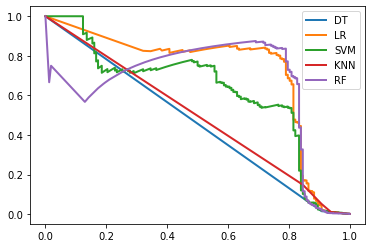

In [680]:
# Graphic Curv x Recall
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(recall_DT, precision_DT, linewidth=2.0, label="DT")
ax.plot(recall_LR, precision_LR, linewidth=2.0, label="LR")
ax.plot(recall_SVM, precision_SVM, linewidth=2.0, label="SVM")
ax.plot(recall_KNN, precision_KNN, linewidth=2.0, label="KNN")
ax.plot(recall_RF, precision_RF, linewidth=2.0, label="RF")

ax.legend()

plt.show()

In [681]:
#Area calculation
print(metrics.auc(recall_DT, precision_DT))
print(metrics.auc(recall_LR, precision_LR))
print(metrics.auc(recall_SVM, precision_SVM))
print(metrics.auc(recall_KNN, precision_KNN))
print(metrics.auc(recall_RF, precision_RF))

0.46153012929239556
0.7190152255881465
0.6152583149080748
0.49345655068764066
0.6504912358563952


#### Undersampling | Model Logistic Regression | Hypermarameter

In [682]:
from sklearn.linear_model import LogisticRegression

clf_LR2 = LogisticRegression(random_state=42)

clf_LR2.fit(X_resRU, y_resRU)

LogisticRegression(random_state=42)

In [683]:
y_pred_LR2 = clf_LR2.predict(X_test)
y_pred_proba_LR2 = clf_LR2.predict_proba(X_test)

In [684]:
confusion_matrix(y_test,y_pred_LR2)

array([[89875,  3950],
       [   15,   147]], dtype=int64)

In [685]:
y_pred_proba_LR2 = clf_LR2.predict_proba(X_test)
precision_LR2, recall_LR2, thresholds_LR2 = metrics.precision_recall_curve(y_test,y_pred_proba_LR2[:,1])
print(metrics.auc(recall_LR2, precision_LR2))
print(recall_score(y_test,y_pred_LR2))

0.7190152255881465
0.9074074074074074


#### Losgistic Regression | Hyperparameter Automation

In [686]:
C=[0.01, 0.1, 1]
solver =["lbfgs", "liblinear", "newton-cg", "sag", "saga"]

for i in C:
    for j in solver:
        clf_LR3 = LogisticRegression(random_state=42, solver=j, C=i)
        clf_LR3.fit(X_resRU, y_resRU)
        y_pred_LR3 = clf_LR3.predict(X_test)
        print(i,j, recall_score(y_test,y_pred_LR3))

0.01 lbfgs 0.8580246913580247
0.01 liblinear 0.9012345679012346
0.01 newton-cg 0.8580246913580247
0.01 sag 0.8580246913580247
0.01 saga 0.8703703703703703
0.1 lbfgs 0.9012345679012346
0.1 liblinear 0.8950617283950617
0.1 newton-cg 0.9012345679012346
0.1 sag 0.8888888888888888
0.1 saga 0.8888888888888888
1 lbfgs 0.9074074074074074
1 liblinear 0.9074074074074074
1 newton-cg 0.9074074074074074
1 sag 0.8950617283950617
1 saga 0.8950617283950617


In [687]:
#exclude warnings to presentation
import warnings
warnings.filterwarnings("ignore")

#### Logistic Regression | Best Model and Hyperparameter Manually

In [688]:
clf_LR4 = LogisticRegression(random_state=42, solver="newton-cg", C=1)
clf_LR4.fit(X_resRU, y_resRU)
y_pred_LR4 = clf_LR4.predict(X_test)
y_pred_proba_LR4 = clf_LR4.predict_proba(X_test)

In [689]:
confusion_matrix(y_test,y_pred_LR4)

array([[89874,  3951],
       [   15,   147]], dtype=int64)

In [690]:
print(metrics.precision_score(y_test, y_pred_LR4))
print(metrics.recall_score(y_test, y_pred_LR4))

0.03587115666178624
0.9074074074074074


In [691]:
precision_LR4, recall_LR4, thresholds_LR4 = metrics.precision_recall_curve(y_test,y_pred_proba_LR4[:,1])

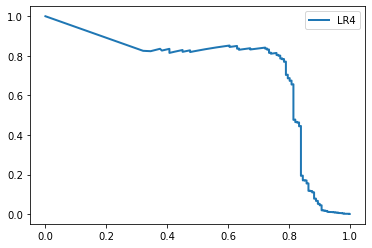

In [692]:
# Graphic Curv x Recall
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(recall_LR4, precision_LR4, linewidth=2.0, label="LR4")

ax.legend()

plt.show()

#### Logistic Regression | Best Model and Hyperparameter Automalically

In [693]:
from sklearn.model_selection import GridSearchCV

In [694]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

LogReg = LogisticRegression(random_state=42)

In [695]:
clf_GS = GridSearchCV(LogReg, parameters, scoring="recall")
clf_GS.fit(X_resRU, y_resRU)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='recall')

In [696]:
clf_GS.best_params_

{'C': 0.001, 'solver': 'liblinear'}

In [697]:
y_pred_GS = clf_GS.predict(X_test)
y_pred_proba_GS = clf_GS.predict_proba(X_test)

confusion_matrix(y_test,y_pred_GS)

array([[81700, 12125],
       [   10,   152]], dtype=int64)

In [698]:
print(metrics.precision_score(y_test, y_pred_GS))
print(metrics.recall_score(y_test, y_pred_GS))

0.012380874806548831
0.9382716049382716


In [699]:
pd.DataFrame(clf_GS.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006674,0.006356,0.000142,0.000285,0.001,lbfgs,"{'C': 0.001, 'solver': 'lbfgs'}",0.772727,0.818182,0.893939,0.833333,0.833333,0.830303,0.038807,28
1,0.000000,0.000000,0.002904,0.005808,0.001,liblinear,"{'C': 0.001, 'solver': 'liblinear'}",0.954545,1.000000,0.954545,0.954545,0.984848,0.969697,0.019165,1


#### SVM | Best Model and Hyperparameter Automalically

In [700]:
from sklearn.model_selection import GridSearchCV

In [701]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

SVMe = SVC(random_state=0, probability=True)

In [702]:
clf_GS2 = GridSearchCV(SVMe, parameters, scoring="recall")
clf_GS2.fit(X_resRU, y_resRU)

GridSearchCV(estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [703]:
clf_GS2.best_params_

{'C': 1, 'kernel': 'linear'}

In [704]:
y_pred_GS2 = clf_GS2.predict(X_test)
y_pred_proba_GS2 = clf_GS2.predict_proba(X_test)

confusion_matrix(y_test,y_pred_GS2)

array([[90812,  3013],
       [   17,   145]], dtype=int64)

In [705]:
print(metrics.precision_score(y_test, y_pred_GS2))
print(metrics.recall_score(y_test, y_pred_GS2))

0.04591513616212793
0.8950617283950617


In [706]:
pd.DataFrame(clf_GS2.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014471,0.002241,0.003430,0.001193,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.787879,0.818182,0.893939,0.878788,0.878788,0.851515,0.041105,13
1,0.034589,0.003768,0.002306,0.003316,0.001,poly,"{'C': 0.001, 'kernel': 'poly'}",0.257576,0.227273,0.257576,0.257576,0.181818,0.236364,0.029691,24


#### Random Forest | Best Model and Hyperparameter Automalically

In [707]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7]
}

In [708]:
RF_GS = RandomForestClassifier(random_state=0)

In [709]:
clf_GS3 = GridSearchCV(RF_GS, parameters, scoring="recall")
clf_GS3.fit(X_resRU, y_resRU)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [710]:
clf_GS3.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}

In [711]:
y_pred_GS3 = clf_GS3.predict(X_test)
y_pred_proba_GS3 = clf_GS3.predict_proba(X_test)

confusion_matrix(y_test,y_pred_GS3)

array([[91991,  1834],
       [   20,   142]], dtype=int64)

In [712]:
print(metrics.precision_score(y_test, y_pred_GS3))
print(metrics.recall_score(y_test, y_pred_GS3))

0.07186234817813765
0.8765432098765432


In [713]:
pd.DataFrame(clf_GS3.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056070,0.003944,0.004498,0.000486,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.818182,0.863636,0.939394,0.893939,0.909091,0.884848,0.041328,19
1,0.109981,0.014187,0.008300,0.002458,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.803030,0.863636,0.939394,0.893939,0.909091,0.881818,0.046355,22


#### KNN | Best Model and Hyperparameter Automalically

In [714]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': [3, 4, 5, 6],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [715]:
KNN_GS = KNeighborsClassifier()

In [716]:
clf_GS4 = GridSearchCV(KNN_GS, parameters, scoring="recall")
clf_GS4.fit(X_resRU, y_resRU)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6]},
             scoring='recall')

In [717]:
clf_GS4.best_params_

{'algorithm': 'auto', 'n_neighbors': 3}

In [718]:
y_pred_GS3 = clf_GS4.predict(X_test)
y_pred_proba_GS3 = clf_GS4.predict_proba(X_test)

confusion_matrix(y_test,y_pred_GS3)

array([[91136,  2689],
       [   15,   147]], dtype=int64)

In [719]:
print(metrics.precision_score(y_test, y_pred_GS3))
print(metrics.recall_score(y_test, y_pred_GS3))

0.05183356840620593
0.9074074074074074


In [720]:
pd.DataFrame(clf_GS4.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001539,0.000468,0.031662,0.001530,auto,3,"{'algorithm': 'auto', 'n_neighbors': 3}",0.833333,0.878788,0.954545,0.909091,0.954545,0.906061,0.046355,1
1,0.001291,0.000393,0.029051,0.000197,auto,4,"{'algorithm': 'auto', 'n_neighbors': 4}",0.803030,0.878788,0.939394,0.893939,0.924242,0.887879,0.047528,9


#### Performing random oversampling

In [133]:
from imblearn.over_sampling import RandomOverSampler 

In [134]:
ros = RandomOverSampler(random_state=42)

In [135]:
X_res, y_res = ros.fit_resample(X_train, y_train)
y_res.value_counts()

0    190490
1    190490
Name: Class, dtype: int64

In [136]:
clfRO = tree.DecisionTreeClassifier(random_state=42)
clfRO = clfRO.fit(X_res, y_res)

In [137]:
y_predRO = clfRO.predict(X_test)

In [138]:
accuracy_score(y_test,y_predRO)

0.9991062593762967

In [139]:
confusion_matrix(y_test,y_predRO)

array([[93793,    32],
       [   52,   110]], dtype=int64)

In [140]:
precision_score(y_test,y_predRO)

0.7746478873239436

In [141]:
recall_score(y_test,y_predRO)

0.6790123456790124

## Using other forms of undersampling

#### ClusterCentroids

In [142]:
from imblearn.under_sampling import ClusterCentroids 

In [143]:
cc = ClusterCentroids(random_state=42)

In [144]:
X_res, y_res = cc.fit_resample(X_train, y_train)

In [145]:
clfCC = tree.DecisionTreeClassifier(random_state=42)
clfCC = clfCC.fit(X_res, y_res)

y_predCC = clfCC.predict(X_test)

confusion_matrix(y_test,y_predCC)

array([[22799, 71026],
       [    2,   160]], dtype=int64)

#### NearMiss

In [146]:
from imblearn.under_sampling import NearMiss 
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)

In [147]:
clfNM = tree.DecisionTreeClassifier(random_state=42)
clfNM = clfNM.fit(X_res, y_res)

y_predNM = clfNM.predict(X_test)

confusion_matrix(y_test,y_predNM)

array([[50758, 43067],
       [    9,   153]], dtype=int64)

## And other forms of oversampling

#### Changing random oversampling parameters

In [148]:
ros = RandomOverSampler(random_state=42,shrinkage=0.5)

X_res, y_res = ros.fit_resample(X_train, y_train)

In [149]:
clfRO2 = tree.DecisionTreeClassifier(random_state=42)
clfRO2 = clfRO2.fit(X_res, y_res)

y_predRO2 = clfRO2.predict(X_test)

confusion_matrix(y_test,y_predRO2)

array([[93109,   716],
       [   25,   137]], dtype=int64)

#### SMOTE

In [150]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

In [151]:
clfROS = tree.DecisionTreeClassifier(random_state=42)
clfROS = clfROS.fit(X_res, y_res)

y_predROS = clfROS.predict(X_test)

confusion_matrix(y_test,y_predROS)

array([[93650,   175],
       [   42,   120]], dtype=int64)

#### ADASYN

In [152]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

In [153]:
clfA = tree.DecisionTreeClassifier(random_state=42)
clfA = clfA.fit(X_res, y_res)

y_predA = clfA.predict(X_test)

confusion_matrix(y_test,y_predA)

array([[93662,   163],
       [   38,   124]], dtype=int64)

## Combinando os métodos

In [154]:
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train, y_train)

In [155]:
clfC = tree.DecisionTreeClassifier(random_state=42)
clfC = clfC.fit(X_res, y_res)

y_predC = clfC.predict(X_test)

confusion_matrix(y_test,y_predC)

array([[93629,   196],
       [   36,   126]], dtype=int64)